- [x] Preparar el entorno
- [x] Explorar y limpiar datos (Eduardo will do this)
- [x] Agrupar y obtener métricas
- [ ] Análisis de tendencias
- [ ] Predecir viralidad del video educativo con un modelo ML Pipeline
- [ ] Interpretación y visualización simple en Spark


# Preparar el entorno
    

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('data-analysis-yt-2024').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/23 21:31:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark.sparkContext.setLogLevel('OFF')

# Explorar y limpiar datos


In [4]:
# by default read.csv ignores row 0 which it is normally the headers.
youtube_trending_dataframe = spark.read.csv('data/US_youtube_trending_data.csv', header=True)

In [5]:
# we are using limit() (returns a specific object) and that one we can use it to use toPandas 
# why using pandas ? to format correctly else by default pyspark manages by default.
youtube_trending_dataframe.limit(20).toPandas()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,FOLLOW ME ON SOCIAL,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,▶ Twitter: https://twitter.com/Brawadis,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,▶ Instagram: https://www.instagram.com/brawadis/,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,▶ Snapchat: brawadis,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,Hi! I’m Brandon Awadis and I like to make dope...,pranks,reactions,challenges and basketball videos. Don’t forge...,None,None,None,None,None,None,None,None,None,None,None,None
6,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
7,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
8,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl
9,XXL presents the 2020 XXL Freshman Class featu...,Polo G,Chika,Baby Keem,Mulatto,Jack Harlow,Rod Wave,Lil Tjay,Calboy,Fivio Foreign,Lil Keed and 10th Spot winner 24kGoldn. Visit...,Neeko Baby and 1st Class#XXLFreshman #XXLFres...,None,None,None,None


In [6]:
# Exploratory Analysis
# With describe
# Pyspark uses pandas but is like a minimal version of Pandas since this "pyspark panda's version" has to 
# deal with the responsibility of loading BUNCH of data that's why it is very raw.
# but since we want to show sth quickly then we can use the method .toPandas() for a quick snapshot.
# but the ideal scenario of course is to use the default pandas version from pysparks as deals with BIG dataset.
youtube_trending_dataframe.describe().toPandas()

# count, mean, stddev (standard desviation), min, max.


,summary,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,count,404805,282762,277058,274333,272982,272020,270765,270423,270145,269975,269823,269540,269463,269288,269115,264545
1,mean,24725.162162162163,1443.742857142857,2006.142857142857,2017.0,1470.2727272727273,18.795679963094415,1124.2727272727273,915.4166666666666,2734345.1366857765,131466.3184371675,1134.2480858947745,10142.767427844372,7.0,8.0,None,None
2,stddev,21322.520772274653,939.2158426123389,22.17861033298798,2.954195783504,914.6651836975092,12.270386747114825,1558.4776604692856,1014.9765435998859,9793885.532781698,453941.51076317247,8047.188592508186,72607.60019013371,0.0,0.0,None,None
3,min,- Facebook: https://www.facebook.com/Ange...,,,,,,& Bodenschatz,Missouri State UniversityJohn McLeod,,& Pullum,& more,'Madonna' and 'Gwen Stefani'.#DuaLipa #DanceT...,7,24-module double-stacked Ultium battery propu...,1804 (Hymenoptera: Formicidae): morphology an...,& Dussutour
4,max,🦋SOCIAL,🦝Raccoon Powers 🦝| Ep. 1 | Afterlife Minecraft...,” says Seth:,” “Skyscraper”) and John Lee (“Anyone Home?”),행복지수 103%,” “The Hunger Games: Mockingjay – Part 1 & 2”),” “The Mummy”),🚨FA CUP FINAL BOUND!🚨 Brighton vs. Manchester ...,” “Trinkets”) as Cyclone,you know?Esta es la liga superior,” “Ramy”),9999,https://doi.org/10.1093/icb/icu006Kobayashi K,24 (2021). https://doi.org/10.1186/s12936-020...,True,🩸LET’S EAT🩸Sink your teeth into the new traile...


In [7]:
# 27 means category "education"
youtube_trending_dataframe.filter(youtube_trending_dataframe.categoryId == '27').limit(20).toPandas()


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...
2,GYeKX_LPY9U,15 Friendliest Sea Creatures Around The World,2020-08-11T16:00:07Z,UCTDJ9osmaIty0MVkUZymVmQ,Amerikano,27,2020-08-12T00:00:00Z,friendliest|sea|creatures|around|world|ocean|a...,880035,16970,626,881,https://i.ytimg.com/vi/GYeKX_LPY9U/default.jpg,False,False,It’s easy to forget just how dangerous the oce...
3,JXzk8G9aXI8,Avatar Intro but with Animals,2020-08-03T21:51:14Z,UCa0LID3WQdj-bd5KiI-34vw,BLTW,27,2020-08-12T00:00:00Z,avatar|avatar the last airbender|avatar meme|a...,1048314,51361,891,965,https://i.ytimg.com/vi/JXzk8G9aXI8/default.jpg,False,False,"Long ago ⏱, the four4️⃣ pets🐶 lived together i..."
4,tqvEEqWGCyE,The (Real) Delusion That You're a Corpse,2020-08-08T14:00:43Z,UCi5iiEyLwSLvlqnMi02u5gQ,Ask A Mortician,27,2020-08-12T00:00:00Z,Cotard's syndrome|mental illness|dead|walking ...,324208,26377,277,2801,https://i.ytimg.com/vi/tqvEEqWGCyE/default.jpg,False,False,More than just feeling a little dead inside. T...
5,CfHieQ0SwpA,National SAT Practice Test Day,2020-08-08T16:00:10Z,UC4a-Gbdw7vOaccHmFo40b9g,Khan Academy,27,2020-08-12T00:00:00Z,online learning|online class|video class|video...,103614,3431,1786,611,https://i.ytimg.com/vi/CfHieQ0SwpA/default.jpg,False,False,"On Saturday, August 8th, join us for the first..."
6,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62939,168,7304,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,None
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-13T00:00:00Z,cgpgrey|education|hello internet,1295517,97359,1011,6984,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-13T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,371463,20052,407,2042,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...
9,GYeKX_LPY9U,15 Friendliest Sea Creatures Around The World,2020-08-11T16:00:07Z,UCTDJ9osmaIty0MVkUZymVmQ,Amerikano,27,2020-08-13T00:00:00Z,friendliest|sea|creatures|around|world|ocean|a...,1190516,18794,808,1019,https://i.ytimg.com/vi/GYeKX_LPY9U/default.jpg,False,False,It’s easy to forget just how dangerous the oce...


In [8]:
youtube_trending_education_dataframe = youtube_trending_dataframe.filter(youtube_trending_dataframe.categoryId == '27')

In [9]:
youtube_trending_education_dataframe.count()

6655

In [10]:
youtube_trending_education_dataframe.summary().toPandas()
# So there are 6655 data for each column BUT description column has 6517 so there may be NULL in few rows.

,summary,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,count,6655,6655,6655,6655,6655,6655,6655,6655,6655,6655,6655,6655,6655,6655,6655,6517
1,mean,None,None,None,None,None,27.0,None,None,1628166.6521412472,88408.26160781368,607.1356874530428,5294.566491359879,None,None,None,None
2,stddev,None,None,None,None,None,0.0,None,None,4113986.0153574413,210322.6781506501,3251.36847419446,6460.054934835712,None,None,None,None
3,min,--DKkzWVh-E,#1 Absolute Best Remedy for Dry and Wrinkled H...,2020-08-03T21:51:14Z,UC-9b7aDP6ZN0coj9-xFnrtw,3Blue1Brown,27,2020-08-12T00:00:00Z,#1 Absolute Best Remedy for Dry and Wrinkled H...,0,0,0,0,https://i.ytimg.com/vi/--DKkzWVh-E/default.jpg,False,False,"## Related VideosQ&A, Lockdown Edition: https:..."
4,25%,None,None,None,None,None,27.0,None,None,516918.0,27160.0,0.0,1787.0,None,None,None,None
5,50%,None,None,None,None,None,27.0,None,None,944536.0,47024.0,0.0,3214.0,None,None,None,None
6,75%,None,None,None,None,None,27.0,None,None,1844899.0,102170.0,368.0,5933.0,None,None,None,None
7,max,zqmOSMAtadc,🛹🦯🧑‍🦽Let’s get Skateboarding in the Paralympics,2024-04-12T18:44:53Z,UCzZb_LdvXc9ggZ7TolEDCvA,skippy62able,27,2024-04-15T00:00:00Z,zodiac|zodiac killer|zodiac killer cypher|zodi...,999187,9993,9978,9990,https://i.ytimg.com/vi/zqmOSMAtadc/default.jpg,True,True,🚨LIMITED EDITION CLOTHING LINE DROP: https://p...


In [11]:
from pyspark.sql.functions import col, sum as _sum
# Count NULLs
youtube_trending_education_dataframe.select([
    _sum(col(c).isNull().cast("int")).alias(c)
    for c in youtube_trending_education_dataframe.columns
]).show()

# Notice that the description contains 138 with NULL values. 

# According to Gerardo
# Caminos para la limpieza de nulos:
# 1. Eliminar la columna
# 2. Eliminar el registro
# 3. Reemplazar el valor vacio por un valor

# Edu decides to see the rest of the value

+--------+-----+-----------+---------+------------+----------+-------------+----+----------+-----+--------+-------------+--------------+-----------------+----------------+-----------+
|video_id|title|publishedAt|channelId|channelTitle|categoryId|trending_date|tags|view_count|likes|dislikes|comment_count|thumbnail_link|comments_disabled|ratings_disabled|description|
+--------+-----+-----------+---------+------------+----------+-------------+----+----------+-----+--------+-------------+--------------+-----------------+----------------+-----------+
|       0|    0|          0|        0|           0|         0|            0|   0|         0|    0|       0|            0|             0|                0|               0|        138|
+--------+-----+-----------+---------+------------+----------+-------------+----+----------+-----+--------+-------------+--------------+-----------------+----------------+-----------+



In [12]:
from pyspark.sql.functions import col

youtube_trending_education_dataframe \
    .filter(col("description").isNull()) \
    .toPandas()

# Take for example this video https://www.youtube.com/watch?v=ia6fRSeK8I0 and notice it doesn't contain description.
# Why? because description is optional for the end user. And this user has forgotten to add a description.

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-13T00:00:00Z,Lock|picking,422963,62939,168,7304,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,None
1,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-14T00:00:00Z,Lock|picking,511773,69610,214,7837,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,None
2,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-15T00:00:00Z,Lock|picking,651306,85757,251,9186,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,None
3,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-16T00:00:00Z,Lock|picking,894083,113892,298,11166,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,None
4,NSuaUok-wTY,[1147] Locksmith Says My Videos Are BS... Lose...,2020-08-12T13:00:12Z,UCm9K6rby98W8JigLoZOh6FQ,LockPickingLawyer,27,2020-08-17T00:00:00Z,Lock|picking,1124329,138882,350,12938,https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,ia6fRSeK8I0,jai shree ram 🚩#shorts #ashortaday,2022-03-15T03:21:02Z,UCuIpkP1H2Vb_NFu8dLIWoPw,CHANDAN ART ACADEMY,27,2022-03-21T00:00:00Z,[None],149615603,7940311,0,48945,https://i.ytimg.com/vi/ia6fRSeK8I0/default.jpg,False,False,None
134,hw4C-X-fUII,THINGS YOU DIDN’T KNOW THE USE OF! #Shorts,2022-03-22T21:00:14Z,UCO5fMPWUjIcQYKPButGib3g,Bobby Moore,27,2022-03-24T00:00:00Z,[None],290780,14949,0,129,https://i.ytimg.com/vi/hw4C-X-fUII/default.jpg,False,False,None
135,hw4C-X-fUII,THINGS YOU DIDN’T KNOW THE USE OF! #Shorts,2022-03-22T21:00:14Z,UCO5fMPWUjIcQYKPButGib3g,Bobby Moore,27,2022-03-25T00:00:00Z,[None],294569,15163,0,130,https://i.ytimg.com/vi/hw4C-X-fUII/default.jpg,False,False,None
136,hw4C-X-fUII,THINGS YOU DIDN’T KNOW THE USE OF! #Shorts,2022-03-22T21:00:14Z,UCO5fMPWUjIcQYKPButGib3g,Bobby Moore,27,2022-03-26T00:00:00Z,[None],300141,15469,0,133,https://i.ytimg.com/vi/hw4C-X-fUII/default.jpg,False,False,None


In [13]:
# Determine data types (I can see above).


# Generate a new dataFrame (a copy), only the ones that are going to be part of the ML process. 
# Hay que usar estadistica: Matrices de correlación tenga con la variable objetivo. 

# Determine variable target and features


In [14]:


youtube_trending_education_dataframe.dtypes

[('video_id', 'string'),
 ('title', 'string'),
 ('publishedAt', 'string'),
 ('channelId', 'string'),
 ('channelTitle', 'string'),
 ('categoryId', 'string'),
 ('trending_date', 'string'),
 ('tags', 'string'),
 ('view_count', 'string'),
 ('likes', 'string'),
 ('dislikes', 'string'),
 ('comment_count', 'string'),
 ('thumbnail_link', 'string'),
 ('comments_disabled', 'string'),
 ('ratings_disabled', 'string'),
 ('description', 'string')]

In [15]:
numeric_cols = ["view_count", "likes", "dislikes", "comment_count"]

youtube_trending_education_dataframe_updated = youtube_trending_education_dataframe
# Then we have to cast to integers because doesn't make sense to have string
for c in numeric_cols:
    youtube_trending_education_dataframe_updated = youtube_trending_education_dataframe_updated.withColumn(c, col(c).cast("int"))

In [16]:
youtube_trending_education_dataframe_updated.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- publishedAt: string (nullable = true)
 |-- channelId: string (nullable = true)
 |-- channelTitle: string (nullable = true)
 |-- categoryId: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- description: string (nullable = true)



In [17]:
youtube_trending_education_dataframe_updated.stat.corr("comment_count", "view_count")

0.34016288475637874

In [18]:
from pyspark.sql import functions as F

numeric_cols = ["view_count", "likes", "dislikes", "comment_count"]

results = []

for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        corr_value = youtube_trending_education_dataframe_updated.stat.corr(col1, col2)
        results.append((col1, col2, corr_value))

for r in results:
    print(f"{r[0]} vs {r[1]} → correlación = {r[2]}")

view_count vs likes → correlación = 0.9030029499338078
view_count vs dislikes → correlación = 0.044224931137396
view_count vs comment_count → correlación = 0.34016288475637874
likes vs dislikes → correlación = 0.04142615426273529
likes vs comment_count → correlación = 0.41696976640934874
dislikes vs comment_count → correlación = 0.382995491213675


Columnas numéricas detectadas: ['view_count', 'likes', 'dislikes', 'comment_count']


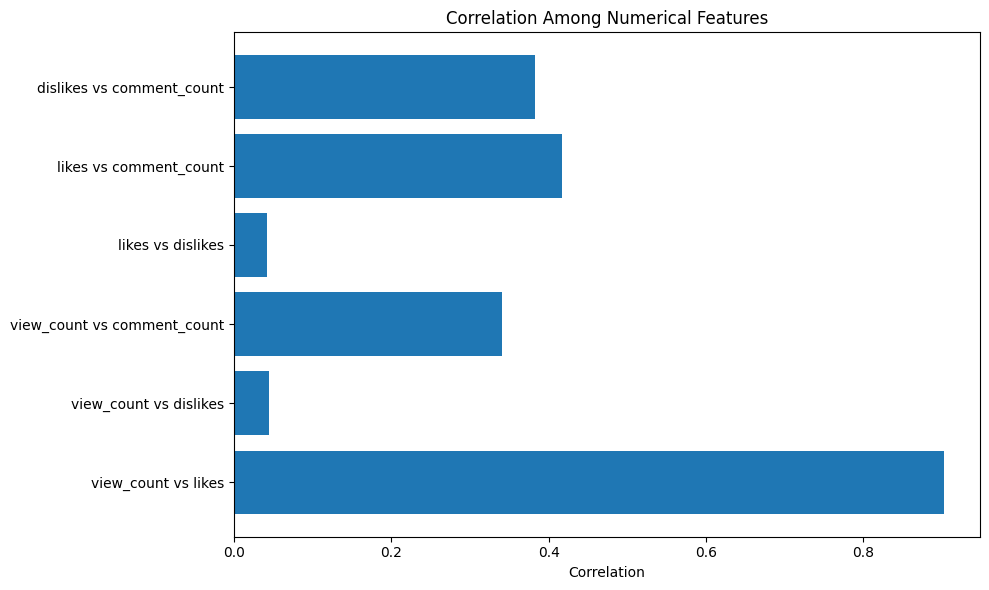

In [19]:
import matplotlib.pyplot as plt
from pyspark.sql.types import NumericType
import numpy as np

df = youtube_trending_education_dataframe_updated  # tu dataframe en uso

# --- 1. Detectar columnas numéricas automáticamente ---
numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]

print("Columnas numéricas detectadas:", numeric_cols)

# --- 2. Calcular correlaciones dinámicamente ---
correlations = {}

for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        corr_val = df.stat.corr(col1, col2)
        correlations[f"{col1} vs {col2}"] = corr_val

# --- 3. Preparar datos para el gráfico ---
labels = list(correlations.keys())
values = list(correlations.values())

# --- 4. Graficar ---
plt.figure(figsize=(10, 6))
plt.barh(labels, values)
plt.xlabel("Correlation")
plt.title("Correlation Among Numerical Features")
plt.tight_layout()
plt.show()

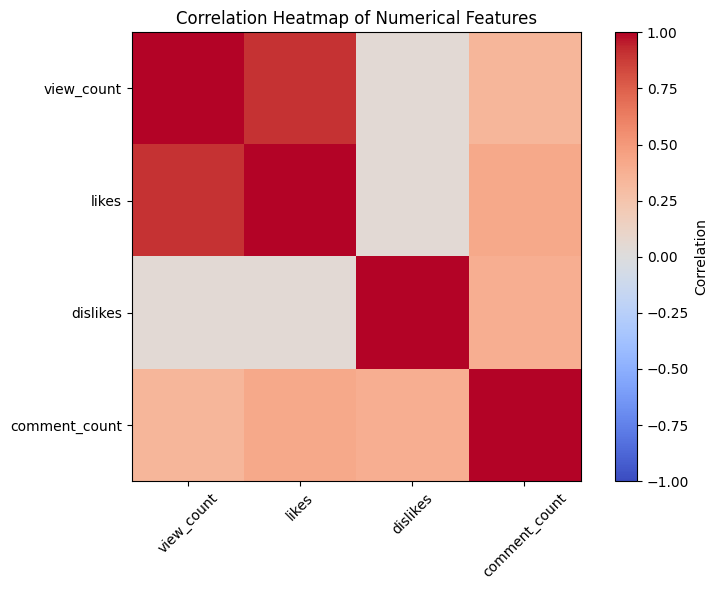

In [20]:
import matplotlib.pyplot as plt
import numpy as np

df = youtube_trending_education_dataframe_updated

# columnas numéricas
numeric_cols = ['view_count', 'likes', 'dislikes', 'comment_count']

# matriz vacía de correlaciones
corr_matrix = np.zeros((len(numeric_cols), len(numeric_cols)))

# llenar matriz
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        corr_matrix[i, j] = df.stat.corr(numeric_cols[i], numeric_cols[j])

# gráfico heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')

# agregar etiquetas
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

Se utilizó el percentil como medida estadística para establecer un umbral objetivo de éxito. En este caso, se aplicó el percentil 75 para identificar los videos con mayor rendimiento dentro del dataset.

In [21]:
from pyspark.sql import functions as F

# Elegir el percentil que quieres usar
PERCENTIL = 0.75  # puedes poner 0.80, 0.90, etc.

threshold = youtube_trending_education_dataframe_updated.approxQuantile(
    "view_count",
    [PERCENTIL],
    0.05 # El margen de error permitido en el cálculo del percentil. --
    # Pyspark trabajar en datos distribuidos y procesar millones de datos uff mucho
    # 0.05 nos da un margen de error +- y lo usamos por que es rápido, exacto para fines 
    # prácticos, es valor recomendado por PysPark en datasets grandes
    # te evita que spark se ponga lento por intentar ser "demasiado exacto
    # además que es un valor requerido :) 
)[0]

print(f"Umbral de éxito (percentil {PERCENTIL}):", threshold)

Umbral de éxito (percentil 0.75): 1612359.0


In [22]:
# Crear la columna is_successful con ese umbral

df_with_target = youtube_trending_education_dataframe_updated.withColumn(
    "is_successful",
    F.when(F.col("view_count") >= threshold, 1).otherwise(0)
)

df_with_target.toPandas()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,is_successful
0,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...,0
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...,0
2,GYeKX_LPY9U,15 Friendliest Sea Creatures Around The World,2020-08-11T16:00:07Z,UCTDJ9osmaIty0MVkUZymVmQ,Amerikano,27,2020-08-12T00:00:00Z,friendliest|sea|creatures|around|world|ocean|a...,880035,16970,626,881,https://i.ytimg.com/vi/GYeKX_LPY9U/default.jpg,False,False,It’s easy to forget just how dangerous the oce...,0
3,JXzk8G9aXI8,Avatar Intro but with Animals,2020-08-03T21:51:14Z,UCa0LID3WQdj-bd5KiI-34vw,BLTW,27,2020-08-12T00:00:00Z,avatar|avatar the last airbender|avatar meme|a...,1048314,51361,891,965,https://i.ytimg.com/vi/JXzk8G9aXI8/default.jpg,False,False,"Long ago ⏱, the four4️⃣ pets🐶 lived together i...",0
4,tqvEEqWGCyE,The (Real) Delusion That You're a Corpse,2020-08-08T14:00:43Z,UCi5iiEyLwSLvlqnMi02u5gQ,Ask A Mortician,27,2020-08-12T00:00:00Z,Cotard's syndrome|mental illness|dead|walking ...,324208,26377,277,2801,https://i.ytimg.com/vi/tqvEEqWGCyE/default.jpg,False,False,More than just feeling a little dead inside. T...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,djIufZ7Fyms,I made FLAPPY BIRD in DUMB programs,2024-04-12T00:29:38Z,UC0e3QhIYukixgh5VVpKHH9Q,Code Bullet,27,2024-04-14T00:00:00Z,artificial|intelligence|coding|processing|java...,859028,76922,0,3232,https://i.ytimg.com/vi/djIufZ7Fyms/default.jpg,False,False,Head to https://brilliant.org/CodeBullet/ to s...,0
6651,M_U_rzlVVdA,Why Utah is So Weird,2024-04-05T14:43:46Z,UC9RM-iSvTu1uPJb8X5yp3EQ,Wendover Productions,27,2024-04-14T00:00:00Z,[None],977850,35554,0,4182,https://i.ytimg.com/vi/M_U_rzlVVdA/default.jpg,False,False,How balanced is your news diet? Go to https://...,0
6652,8AbtCE-sePc,What Happened To The Nautilus?,2024-04-12T18:44:53Z,UC1ZBQ-F-yktYD4m5AzM6pww,Mustard,27,2024-04-15T00:00:00Z,North Pole Exploration|Nautilus Submarine|Hube...,2449742,71883,0,1687,https://i.ytimg.com/vi/8AbtCE-sePc/default.jpg,False,False,Get Nebula for just $2.50 a month here: https:...,1
6653,djIufZ7Fyms,I made FLAPPY BIRD in DUMB programs,2024-04-12T00:29:38Z,UC0e3QhIYukixgh5VVpKHH9Q,Code Bullet,27,2024-04-15T00:00:00Z,artificial|intelligence|coding|processing|java...,953545,82791,0,3403,https://i.ytimg.com/vi/djIufZ7Fyms/default.jpg,False,False,Head to https://brilliant.org/CodeBullet/ to s...,0


In [23]:
df_with_target.groupBy("is_successful").count().show()

+-------------+-----+
|is_successful|count|
+-------------+-----+
|            1| 1923|
|            0| 4732|
+-------------+-----+



### Metricas
A continuación necesitamos metricas importantes como engagement_rate, like_ratio, comment_rate los cuales son estándar
de la industria usadas en:

	•	Marketing digital
	•	YouTube Analytics
	•	TikTok Creator Insights
	•	Instagram Insights
	•	Estudios académicos de Social Media
	•	Papers sobre virality & engagement
	•	Plataformas de análisis (TubeBuddy, VidIQ, Sprout Social, Hootsuite)
Son métricas clásicas para medir interacción, sentimiento, conversación y engagement.

🧠 1. Engagement Rate → Fórmula clásica

✔ Fórmula estándar del marketing:

Engagement Rate = (likes + comments + shares) / views

Fuentes que la utilizan:
	•	YouTube API Analytics
	•	Hootsuite Social Media Guide https://blog.hootsuite.com/calculate-engagement-rate/ 
	•	Sprout Social Engagement Report https://sproutsocial.com/insights/social-media-metrics/
	•	Papers sobre “Social Media Engagement Rate” https://ijoc.org/index.php/ijoc/article/view/3655 

Nosotros usamos una variante simplificada:

👉 Porque YouTube Trending Dataset no tiene shares, solo:
likes, dislikes, comment_count.

Por eso usamos:

(likes + comment_count) / views

📌 Esta fórmula aparece documentada en:
	•	“Understanding Video Popularity in YouTube” (un paper famoso del MIT) https://people.csail.mit.edu/karthikv/papers/youtube-pv.pdf 
	•	“A Large-Scale Study of YouTube Video Engagement” (Cornell University) https://arxiv.org/abs/1609.01369
	•	Marketing Science Journal: Social Video Analytics

⸻

🧠 2. Like Ratio → Indicador oficial de sentimiento

✔ Fórmula estándar:

Like Ratio = likes / (likes + dislikes)

Esta es la métrica oficial que usa YouTube en su API desde 2012.

Fuentes:
	•	YouTube Data API v3 reference
	•	VidIQ & TubeBuddy ranking factors
	•	Papers: “Measuring Sentiment in YouTube Interactions”

¿Por qué importa?

Porque es un sentiment score:
	•	1.0 → todo positivo
	•	0.5 → polarizado
	•	0.0 → todo negativo

⸻

🧠 3. Comment Rate → Métrica académica de conversación

✔ Fórmula tradicional:

Comment Rate = comments / views

Fuentes:
	•	International Journal of Communication – Audience Engagement Metrics
	•	YouTube Research Division – Comment to View Ratio Study
	•	Facebook / TikTok / Instagram papers sobre “conversation rate”

Esta métrica mide:
	•	qué tanto el video genera conversación,
	•	emociones,
	•	polémica,
	•	interacción profunda.

otras fuentes:

🔗 “Predicting Video Popularity on YouTube” – Stanford

https://cs.stanford.edu/people/jure/pubs/youtube-icwsm12.pdf

🔗 “Video Popularity Dynamics” – USC

https://arxiv.org/abs/1301.7064


In [32]:
from pyspark.sql import functions as F

# “Se trabaja con un segundo DataFrame (df_metrics) 
# para mantener una arquitectura modular, donde cada etapa del procesamiento de 
# datos —desde la creación del target hasta el feature engineering— esté claramente separada. 
# Esta práctica es estándar en proyectos de Big Data y Machine Learning.”

# ============================================================
# CREAMOS NUEVAS MÉTRICAS PARA ANALIZAR EL RENDIMIENTO DEL VIDEO
# ============================================================

df_metrics = (
    df_with_target   # este es tu dataframe que ya tiene "is_successful"

    # ------------------------------------------------------------
    # 1) ENGAGEMENT RATE
    #    Fórmula: (likes + comentarios) / vistas
    #    Explica: qué tan participativa fue la audiencia respecto
    #              al total de personas que vieron el video.
    #    Evitamos división por cero usando F.when(view_count > 0).
    # ------------------------------------------------------------
    .withColumn(
        "engagement_rate",
        F.when(
            F.col("view_count") > 0,
            (F.col("likes") + F.col("comment_count")) / F.col("view_count")
        ).otherwise(0)
    )

    # ------------------------------------------------------------
    # 2) LIKE RATIO
    #    Fórmula: likes / (likes + dislikes)
    #    Explica: mide qué tan positivo es el sentimiento del público.
    #              Si es 1 → solo likes.
    #              Si es 0.5 → mitad likes, mitad dislikes.
    #              Si es 0   → solo dislikes.
    #    También evitamos dividir por 0.
    # ------------------------------------------------------------
    .withColumn(
        "like_ratio",
        F.when(
            (F.col("likes") + F.col("dislikes")) > 0,
            F.col("likes") / (F.col("likes") + F.col("dislikes"))
        ).otherwise(0)
    )

    # ------------------------------------------------------------
    # 3) COMMENT RATE
    #    Fórmula: comentarios / vistas
    #    Explica: qué tan conversacional es el video.
    #              Si la gente comenta mucho, suele indicar
    #              mayor conexión emocional o contenido polémico.
    # ------------------------------------------------------------
    .withColumn(
        "comment_rate",
        F.when(
            F.col("view_count") > 0,
            F.col("comment_count") / F.col("view_count")
        ).otherwise(0)
    )
)

# ============================================================
# MOSTRAR LAS COLUMNAS MÁS IMPORTANTES PARA VERIFICAR EL CALCULO
# ============================================================

df_metrics.select(
    "view_count",
    "likes",
    "dislikes",
    "comment_count",
    "is_successful",     # tu variable objetivo
    "engagement_rate",
    "like_ratio",
    "comment_rate"
).show(10, truncate=False)

# @todo: Do this with round by 5 zeros 

+----------+-----+--------+-------------+-------------+--------------------+------------------+---------------------+
|view_count|likes|dislikes|comment_count|is_successful|engagement_rate     |like_ratio        |comment_rate         |
+----------+-----+--------+-------------+-------------+--------------------+------------------+---------------------+
|1050143   |89190|854     |6455         |0            |0.09107807222444943 |0.9905157478566035|0.006146781914463078 |
|236830    |16423|209     |1642         |0            |0.07627834311531478 |0.9874338624338624|0.006933243254655238 |
|880035    |16970|626     |881          |0            |0.020284420506002602|0.9644237326665152|0.0010010965472964143|
|1048314   |51361|891     |965          |0            |0.049914434034077575|0.9829480211283779|9.205257203471479E-4 |
|324208    |26377|277     |2801         |0            |0.0899977792034743  |0.9896075635927065|0.008639515372847061 |
|103614    |3431 |1786    |611          |0            |0

In [33]:
df_metrics.count()

6655

In [29]:
df_metrics.summary()

DataFrame[summary: string, video_id: string, title: string, publishedAt: string, channelId: string, channelTitle: string, categoryId: string, trending_date: string, tags: string, view_count: string, likes: string, dislikes: string, comment_count: string, thumbnail_link: string, comments_disabled: string, ratings_disabled: string, description: string, is_successful: string, engagement_rate: string, like_ratio: string, comment_rate: string]

In [30]:
from pyspark.sql import functions as F

# Lista de métricas creadas
metrics = ["engagement_rate", "like_ratio", "comment_rate"]

print("Correlación de cada métrica con el éxito (is_successful):\n")

for m in metrics:
    corr = df_metrics.stat.corr(m, "is_successful")
    print(f"{m} → {corr}")

Correlación de cada métrica con el éxito (is_successful):

engagement_rate → -0.11674952244276182
like_ratio → -0.01477317034774792
comment_rate → -0.18154493708280894


🔍 Correlación entre métricas de interacción y éxito del video

Las tres métricas calculadas (engagement_rate, like_ratio y comment_rate) muestran una correlación negativa o cercana a cero respecto a la variable objetivo is_successful, que define éxito únicamente en función del número de vistas (top 25%).

Esto indica que:
	•	Los videos con más vistas no son necesariamente los que más interacción generan.
	•	El engagement_rate tiende a ser más alto en videos pequeños con audiencias fieles.
	•	El comment_rate también es mayor en videos que provocan conversación, pero no siempre alcanzan grandes volúmenes de vistas.
	•	El like_ratio mide sentimiento positivo, pero no es un predictor de viralidad.

Por lo tanto:

La interacción no garantiza viralidad, y la viralidad no garantiza interacción.
Esto coincide con estudios académicos sobre dinámica de popularidad en YouTube.

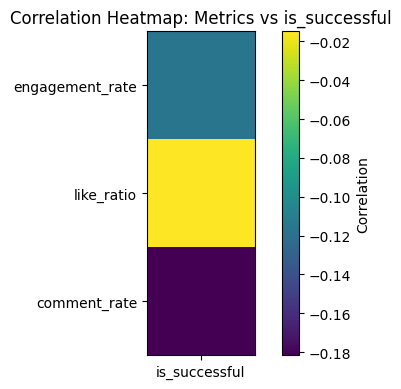

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas que queremos comparar con is_successful
metrics = ["engagement_rate", "like_ratio", "comment_rate"]

# Crear matriz de correlación (3 filas, 1 columna)
corr_values = []
for m in metrics:
    corr = df_metrics.stat.corr(m, "is_successful")
    corr_values.append(corr)

corr_matrix = np.array(corr_values).reshape(len(metrics), 1)

# ---- Graficar heatmap ----
plt.figure(figsize=(6, 4))
plt.imshow(corr_matrix, cmap="viridis")   # sin estilos, permitido
plt.colorbar(label="Correlation")

# Etiquetas
plt.xticks([0], ["is_successful"])
plt.yticks(range(len(metrics)), metrics)

plt.title("Correlation Heatmap: Metrics vs is_successful")
plt.tight_layout()
plt.show()

✅ Qué significa correlación cerca de 1, 0 o -1

⭐ +1 → correlación PERFECTA POSITIVA
	•	Las dos variables suben juntas.
	•	Ejemplo: más vistas → más likes (esto normalmente tiene correlación alta).

⭐ 0 → NO hay relación
	•	Una variable no predice nada de la otra.
	•	Ejemplo: like_ratio con is_successful (tu dataset dio ≈ -0.01).

⭐ -1 → correlación PERFECTA NEGATIVA
	•	Cuando una sube, la otra baja exactamente.
	•	Ejemplo imaginario: más dislikes → menos vistas (en teoría).


✔ Sí, para que haya correlación fuerte tiene que acercarse a 1 o -1.
	•	Entre 0.7 y 1.0 → Correlación fuerte.
	•	Entre 0.3 y 0.7 → Correlación moderada.
	•	Entre 0.1 y 0.3 → Correlación débil.
	•	Entre -0.1 y 0.1 → Casi sin correlación.


    is_successful están así:
	•	engagement_rate → -0.11 (débil)
	•	like_ratio → -0.01 (casi 0)
	•	comment_rate → -0.18 (débil)

    Conclusión:
👉 No existe relación lineal fuerte entre estas métricas y el éxito medido en vistas.'




# @todo add correlation map with all the numeric variables.

In [35]:
df_metrics.toPandas()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,is_successful,engagement_rate,like_ratio,comment_rate
0,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...,0,0.091078,0.990516,0.006147
1,9nidKH8cM38,TAXI CAB SLAYER KILLS 'TO KNOW HOW IT FEELS',2020-08-11T20:00:45Z,UCFMbX7frWZfuWdjAML0babA,Eleanor Neale,27,2020-08-12T00:00:00Z,eleanor|neale|eleanor neale|eleanor neale true...,236830,16423,209,1642,https://i.ytimg.com/vi/9nidKH8cM38/default.jpg,False,False,The first 1000 people to click the link will g...,0,0.076278,0.987434,0.006933
2,GYeKX_LPY9U,15 Friendliest Sea Creatures Around The World,2020-08-11T16:00:07Z,UCTDJ9osmaIty0MVkUZymVmQ,Amerikano,27,2020-08-12T00:00:00Z,friendliest|sea|creatures|around|world|ocean|a...,880035,16970,626,881,https://i.ytimg.com/vi/GYeKX_LPY9U/default.jpg,False,False,It’s easy to forget just how dangerous the oce...,0,0.020284,0.964424,0.001001
3,JXzk8G9aXI8,Avatar Intro but with Animals,2020-08-03T21:51:14Z,UCa0LID3WQdj-bd5KiI-34vw,BLTW,27,2020-08-12T00:00:00Z,avatar|avatar the last airbender|avatar meme|a...,1048314,51361,891,965,https://i.ytimg.com/vi/JXzk8G9aXI8/default.jpg,False,False,"Long ago ⏱, the four4️⃣ pets🐶 lived together i...",0,0.049914,0.982948,0.000921
4,tqvEEqWGCyE,The (Real) Delusion That You're a Corpse,2020-08-08T14:00:43Z,UCi5iiEyLwSLvlqnMi02u5gQ,Ask A Mortician,27,2020-08-12T00:00:00Z,Cotard's syndrome|mental illness|dead|walking ...,324208,26377,277,2801,https://i.ytimg.com/vi/tqvEEqWGCyE/default.jpg,False,False,More than just feeling a little dead inside. T...,0,0.089998,0.989608,0.008640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,djIufZ7Fyms,I made FLAPPY BIRD in DUMB programs,2024-04-12T00:29:38Z,UC0e3QhIYukixgh5VVpKHH9Q,Code Bullet,27,2024-04-14T00:00:00Z,artificial|intelligence|coding|processing|java...,859028,76922,0,3232,https://i.ytimg.com/vi/djIufZ7Fyms/default.jpg,False,False,Head to https://brilliant.org/CodeBullet/ to s...,0,0.093308,1.000000,0.003762
6651,M_U_rzlVVdA,Why Utah is So Weird,2024-04-05T14:43:46Z,UC9RM-iSvTu1uPJb8X5yp3EQ,Wendover Productions,27,2024-04-14T00:00:00Z,[None],977850,35554,0,4182,https://i.ytimg.com/vi/M_U_rzlVVdA/default.jpg,False,False,How balanced is your news diet? Go to https://...,0,0.040636,1.000000,0.004277
6652,8AbtCE-sePc,What Happened To The Nautilus?,2024-04-12T18:44:53Z,UC1ZBQ-F-yktYD4m5AzM6pww,Mustard,27,2024-04-15T00:00:00Z,North Pole Exploration|Nautilus Submarine|Hube...,2449742,71883,0,1687,https://i.ytimg.com/vi/8AbtCE-sePc/default.jpg,False,False,Get Nebula for just $2.50 a month here: https:...,1,0.030032,1.000000,0.000689
6653,djIufZ7Fyms,I made FLAPPY BIRD in DUMB programs,2024-04-12T00:29:38Z,UC0e3QhIYukixgh5VVpKHH9Q,Code Bullet,27,2024-04-15T00:00:00Z,artificial|intelligence|coding|processing|java...,953545,82791,0,3403,https://i.ytimg.com/vi/djIufZ7Fyms/default.jpg,False,False,Head to https://brilliant.org/CodeBullet/ to s...,0,0.090393,1.000000,0.003569


In [38]:
cols_to_drop = [
    "video_id",
    "channelId",
    "channelTitle",
    "categoryId",
    "title",
    "publishedAt",
    "trending_date",
    "tags",
    "thumbnail_link",
    "comments_disabled",
    "ratings_disabled",
    "description"
]

df_yt_education_cleaned = df_metrics.drop(*cols_to_drop)

df_yt_education_cleaned.printSchema()

root
 |-- view_count: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- is_successful: integer (nullable = false)
 |-- engagement_rate: double (nullable = true)
 |-- like_ratio: double (nullable = true)
 |-- comment_rate: double (nullable = true)



In [46]:
df_yt_education_cleaned.toPandas()

,view_count,likes,dislikes,comment_count,is_successful,engagement_rate,like_ratio,comment_rate
0,1050143,89190,854,6455,0,0.091078,0.990516,0.006147
1,236830,16423,209,1642,0,0.076278,0.987434,0.006933
2,880035,16970,626,881,0,0.020284,0.964424,0.001001
3,1048314,51361,891,965,0,0.049914,0.982948,0.000921
4,324208,26377,277,2801,0,0.089998,0.989608,0.008640
...,...,...,...,...,...,...,...,...
6650,859028,76922,0,3232,0,0.093308,1.000000,0.003762
6651,977850,35554,0,4182,0,0.040636,1.000000,0.004277
6652,2449742,71883,0,1687,1,0.030032,1.000000,0.000689
6653,953545,82791,0,3403,0,0.090393,1.000000,0.003569


In [ ]:
# @todo:

Lo que hay que hacer es normalizar la data
y hay 2 técnicas:

1. La estandard scaler
2. Min Max Scaler

la finalidad es que esten los valores faciles para trabajar -- ya que tengo valores de un millon y otros en 0.004 y 
queremos todas las columnas sean proporcionales. 
y así cuando armemos una formula NO se tenga un sesgo.

El que más se usa es el Standard Scaler y el más fácil es el Min Max Scaler. 

2 técnicas:

Crear tu propio Scaler -- senior data analyst. Se implementa con logaritmos y otras técnicas matematicas y de investigación.

Esta es la parte más dura. 




In [45]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# 1) Columnas numéricas que quieres escalar
feature_cols = [
    "engagement_rate",
    "like_ratio",
    "comment_rate",
    "likes",
    "dislikes",
    "comment_count"
]

# 2) Crear un vector llamado "features"
assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features"
)

df_vect = assembler.transform(df_yt_education_cleaned)

# 3) Escalar ese vector
scaler = StandardScaler(
    inputCol="features",
    outputCol="features_scaled",
    withMean=False,   # usar False para evitar errores con vectores Sparse
    withStd=True
)

scaler_model = scaler.fit(df_vect)
df_scaled = scaler_model.transform(df_vect)

df_scaled.select("features", "features_scaled").toPandas()

,features,features_scaled
0,"[0.09107807222444943, 0.9905157478566035, 0.00...","[3.2480302578478493, 11.225754123520236, 1.321..."
1,"[0.07627834311531478, 0.9874338624338624, 0.00...","[2.720241660874046, 11.19082637192475, 1.49114..."
2,"[0.020284420506002602, 0.9644237326665152, 0.0...","[0.7233839052285026, 10.930047015637394, 0.215..."
3,"[0.049914434034077575, 0.9829480211283779, 0.0...","[1.780050763991832, 11.139987249334858, 0.1979..."
4,"[0.0899977792034743, 0.9896075635927065, 0.008...","[3.209504800141388, 11.215461451982788, 1.8581..."
...,...,...
6650,"[0.09330778507801842, 1.0, 0.00376239191271995...","[3.327546376687706, 11.33324144296733, 0.80918..."
6651,"[0.04063608937976172, 1.0, 0.00427672955974842...","[1.4491660247354736, 11.33324144296733, 0.9198..."
6652,"[0.030031733954024545, 1.0, 0.0006886439469952...","[1.0709930304401325, 11.33324144296733, 0.1481..."
6653,"[0.0903932168906554, 1.0, 0.003568788048807345...","[3.2236069165091163, 11.33324144296733, 0.7675..."
